In [1]:
import matplotlib.pylab as plt
import numpy as np
plt.style.use(["science","no-latex", "/afs/ihep.ac.cn/users/l/luoxj/Style/Paper.mplstyle"])
%config InlineBackend.figure_format = 'svg'
#plt.rcParams['figure.dpi'] = 300
#plt.rcParams['savefig.dpi'] = 300
import sys
sys.path.append("/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/")

In [51]:
from importlib import reload
import LoadMultiFiles
reload(LoadMultiFiles)
from LoadMultiFiles import LoadOneFileUprootCertainEntries,LoadOneFileUproot,LoadOneFile
n_entries_load = 10000
list_truth_to_save = [ 'PulseTimeTruth', "TriggerTime"]

# dir_features = LoadOneFile("/afs/ihep.ac.cn/users/l/luoxj/PSD_Supernova/run_ExtractFeatures_AfterPulse/features_noShift_0__full.npz", key_in_file="dir_variables", whether_use_filter=False)
#

# dir_calib = LoadOneFileUprootCertainEntries("/afs/ihep.ac.cn/users/l/luoxj/PSD_Supernova/myJUNOCommon/share/PSD/root_SaveTimeCharge/user_PSD_0__SN.root",
#                                             name_branch="evt", return_list=False, n_entries_load=n_entries_load)
# dir_map = LoadOneFileUprootCertainEntries(f"/afs/ihep.ac.cn/users/l/luoxj/PSD_Supernova/myJUNOCommon/share/tag_event/sn_tag_0_save_TimeTruth.root",
#                                             list_load_branch=["evtType", "recX",
#                                             "recY", "recZ","TriggerTimeInterval",
#                                             "TriggerTime", "ratioAP", "ratioSN","ratioDN"]+list_truth_to_save,
#                                             name_branch='evtTruth',
#                                             return_list=False, n_entries_load=n_entries_load)

dir_features = LoadOneFile("/afs/ihep.ac.cn/users/l/luoxj/PSD_Supernova/run_ExtractFeatures_AfterPulse/root_full/features_noShift_10__full.npz", key_in_file="dir_variables", whether_use_filter=False)
dir_map = LoadOneFileUprootCertainEntries(f"/afs/ihep.ac.cn/users/l/luoxj/PSD_Supernova/myJUNOCommon/share/tag_event/root_saveTimeTruth/sn_tag_10.root",
                                          list_load_branch=["evtType", "recX",
                                                            "recY", "recZ","TriggerTimeInterval",
                                                            "TriggerTime"]+list_truth_to_save,
                                          name_branch='evtTruth',
                                          return_list=False, n_entries_load=n_entries_load)
for key in dir_features.keys():
    dir_features[key] = dir_features[key][:n_entries_load]


/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/LoadMultiFiles.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  dir_event[key] = np.array( list(tree[key]) )


In [43]:
print(dir_features["TriggerTimeIntervalWithFilter"][:5])
print(dir_features["tag"][:5])
print(dir_map["evtType"][:10])
print(dir_map.keys())
# print( len(dir_map["evtType"]), len(dir_features["tag"]), len( dir_calib["Time"] ) )
print( dir_features.keys())

[0.00000e+00 0.00000e+00 1.09500e+00 3.23500e+00 1.97687e+03]
['pES', 'N12', 'AfterPulse', 'AfterPulse', 'IBDp']
['pES' 'N12' 'AfterPulse' 'AfterPulse' 'IBDp' 'IBDd' 'C12' 'N12' 'IBDp'
 'AfterPulse']
dict_keys(['evtType', 'recX', 'recY', 'recZ', 'TriggerTimeInterval', 'TriggerTime', 'PulseTimeTruth'])
dict_keys(['tag', 'std', 'mean', 'max_total', 'cumulate2', 'cumulate5', 'cumulate8', 'max', 'fluctuation', 'TriggerTimeInterval', 'R3', 'Kurtosis', 'TotalCharge_lastEvt', 'recE_lastEvt_without_filter', 'TotalCharge_lastEvt_without_filter', 'TriggerTimeIntervalWithFilter', 'recE', 'TotalCharge', 'TimeOverThreshold', 'Skewness'])


# Time Profile with Last Event

['AfterPulse' 'AfterPulse' 'AfterPulse' ... 'AfterPulse' 'AfterPulse'
 'AfterPulse']


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/afs/ihep.ac.cn/users/l/luoxj/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_24457/1168105057.py", line 17, in <module>
    pdf.savefig()
  File "/afs/ihep.ac.cn/users/l/luoxj/.local/lib/python3.8/site-packages/matplotlib/backends/backend_pdf.py", line 2678, in savefig
    figure.savefig(self, format="pdf", **kwargs)
  File "/afs/ihep.ac.cn/users/l/luoxj/.local/lib/python3.8/site-packages/matplotlib/figure.py", line 3015, in savefig
    self.canvas.print_figure(fname, **kwargs)
  File "/afs/ihep.ac.cn/users/l/luoxj/.local/lib/python3.8/site-packages/matplotlib/backend_bases.py", line 2255, in print_figure
    result = print_method(
  File "/afs/ihep.ac.cn/users/l/luoxj/.local/lib/python3.8/site-packages/matplotlib/backend_bases.py", line 1669, in wrapper
    return func(*args, **kwargs)
  File "/afs/ihep.ac.cn/users/l/luox

TypeError: object of type 'NoneType' has no len()

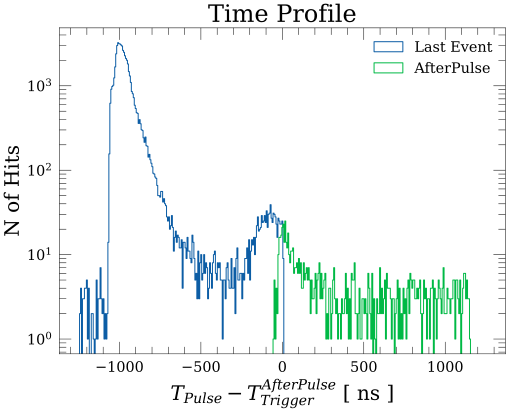

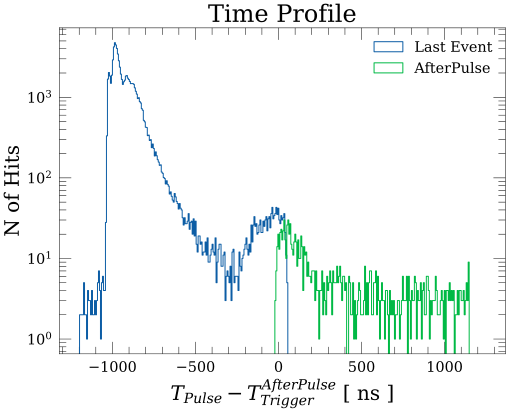

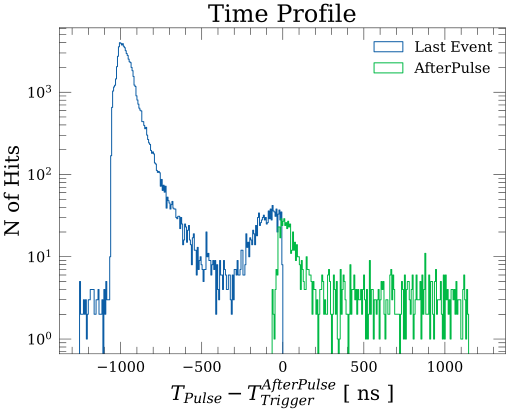

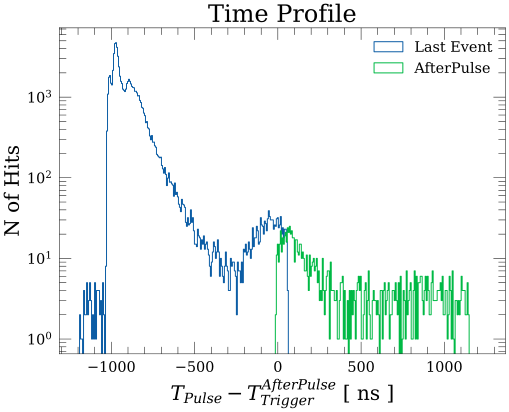

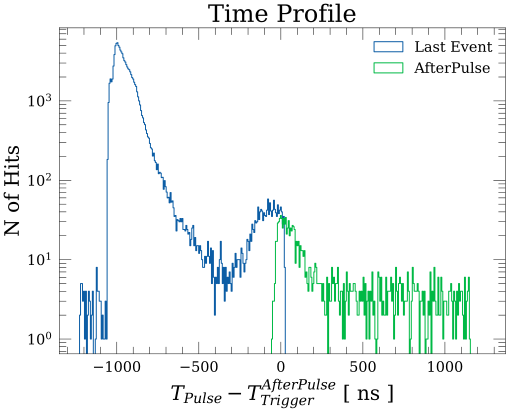

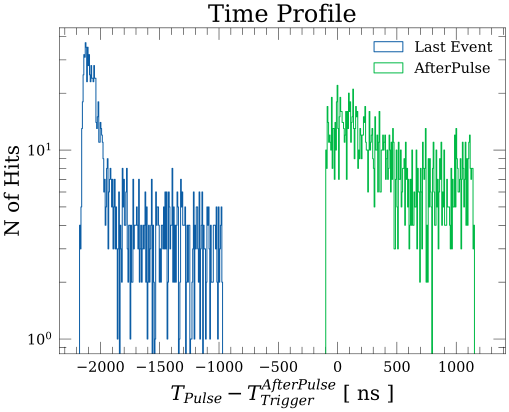

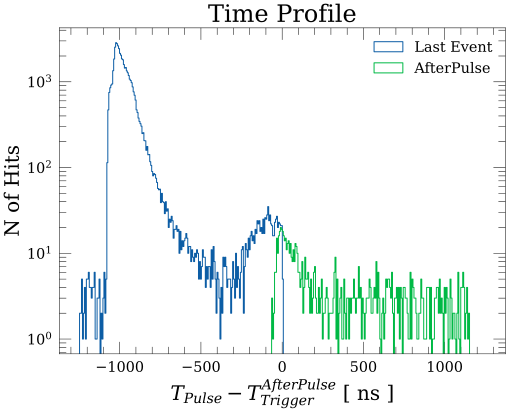

In [59]:
from matplotlib.backends.backend_pdf import PdfPages
path_save_pdf = "/afs/ihep.ac.cn/users/l/luoxj/PSD_Supernova/code/pdf/"

index_tag = np.where( dir_map["evtType"]=="AfterPulse" )[0]
print( dir_map["evtType"][index_tag])
with PdfPages(path_save_pdf+"TruthTimeWithLastEvt.pdf") as pdf:
    for i_plot, i in enumerate( index_tag ):
        plt.figure()
        bins = np.arange( min(dir_map["PulseTimeTruth"][i-1]-dir_map["TriggerTime"][i]),1250, 6)
        plt.hist(dir_map["PulseTimeTruth"][i-1]-dir_map["TriggerTime"][i], bins=bins,histtype="step", label="Last Event")
        plt.hist(dir_map["PulseTimeTruth"][i]-dir_map["TriggerTime"][i], bins=bins, histtype="step", label="AfterPulse")
        plt.xlabel("$T_{Pulse}-T_{Trigger}^{AfterPulse}$ [ ns ]")
        plt.title("Time Profile")
        plt.ylabel("N of Hits")
        plt.legend()
        plt.semilogy()
        pdf.savefig()
        if i_plot >5:
            plt.close()
        if i_plot >50:
            break


# Time Profile with Correlated Event of AfterPulse

['AfterPulse' 'AfterPulse' 'AfterPulse' ... 'AfterPulse' 'AfterPulse'
 'AfterPulse']


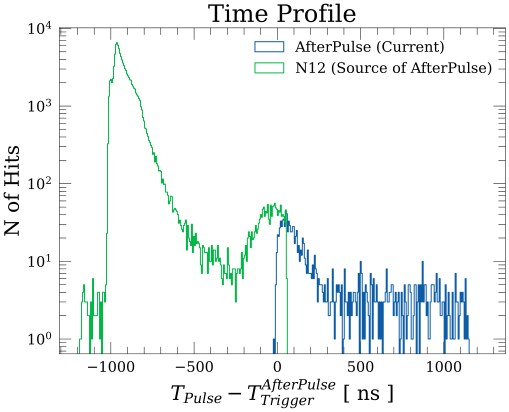

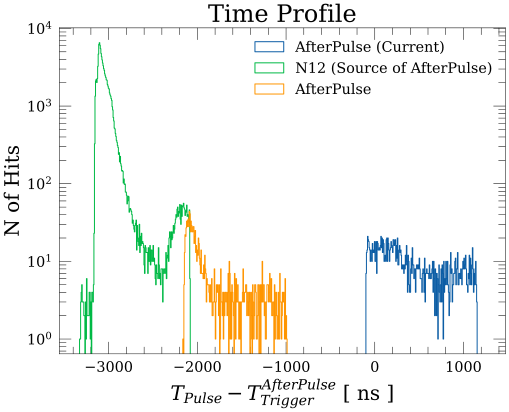

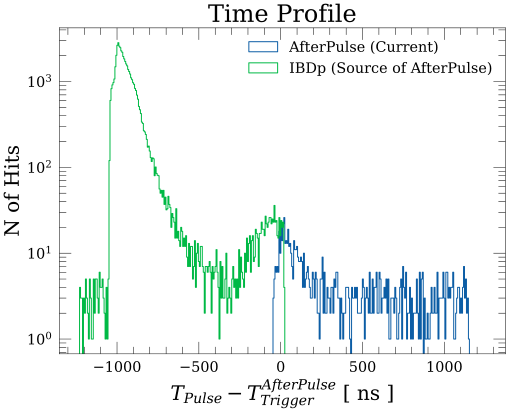

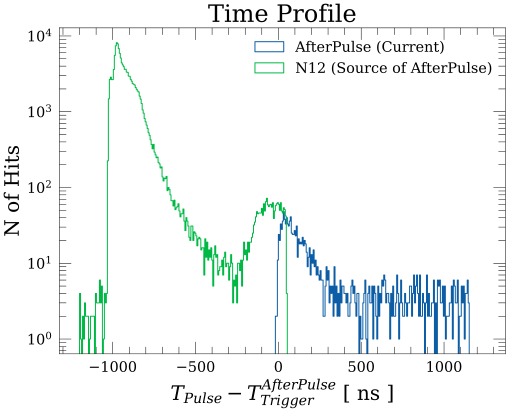

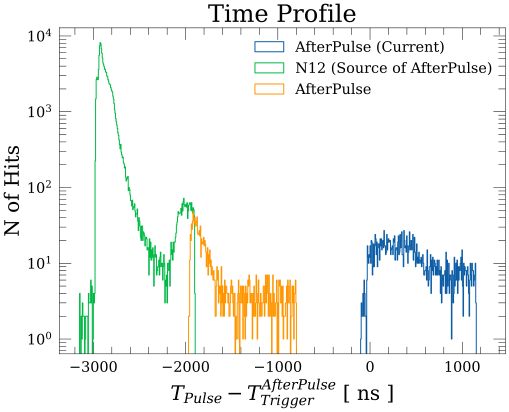

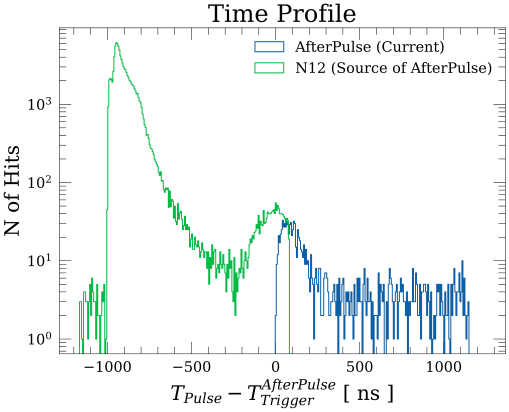

In [5]:
index_tag = np.where( dir_map["evtType"]=="AfterPulse" )[0]
print( dir_map["evtType"][index_tag])
with PdfPages(path_save_pdf+"TruthTimeWithSourceOfEvt.pdf") as pdf:
# if True:
    for i_plot, i in enumerate( index_tag ):
        plt.figure()

        i_source_AfterPulse = np.where( dir_map["TriggerTime"] >=\
                                        dir_map["TriggerTime"][i]-dir_features["TriggerTimeIntervalWithFilter"][i]*1000-10 )[0][0]

        bins = np.arange( min(dir_map["PulseTimeTruth"][i_source_AfterPulse]-dir_map["TriggerTime"][i]),1250, 6)

        # print( dir_map["TriggerTime"][i_source_AfterPulse]-dir_map["TriggerTime"][i] )

        plt.hist(dir_map["PulseTimeTruth"][i]-dir_map["TriggerTime"][i], bins=bins, histtype="step", label="AfterPulse (Current)")

        for j in range(i_source_AfterPulse, i):
            if j==i_source_AfterPulse:
                label = f"{dir_map['evtType'][j]} (Source of AfterPulse)"
            else:
                label= dir_map['evtType'][j]
            plt.hist(dir_map["PulseTimeTruth"][j]-dir_map["TriggerTime"][i], bins=bins,histtype="step", label=label)

        plt.xlabel("$T_{Pulse}-T_{Trigger}^{AfterPulse}$ [ ns ]")
        plt.title("Time Profile")
        plt.ylabel("N of Hits")
        plt.legend()
        plt.semilogy()

        pdf.savefig()
        if i_plot >5:
            plt.close()
        if i_plot >50:
            break

[]

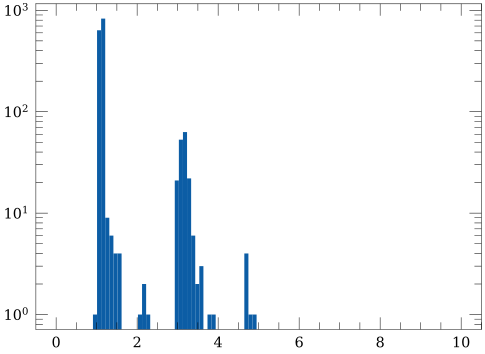

In [60]:

index_tag = np.where( dir_map["evtType"]=="AfterPulse" )[0]
plt.hist(dir_features["TriggerTimeIntervalWithFilter"][index_tag], bins=np.linspace(0,10,100))
plt.semilogy()

(array([ 461, 2471, 4600, 9409]),)
-2194.0
-2269.0
-2276.0
-2127.0


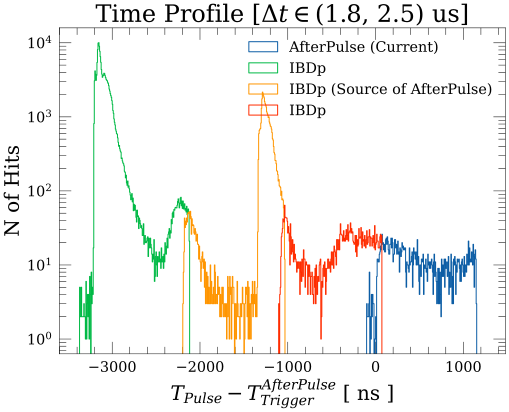

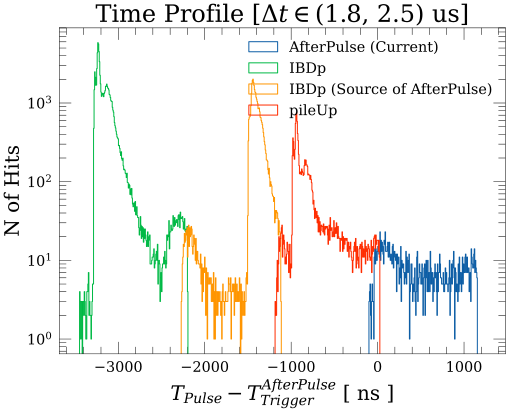

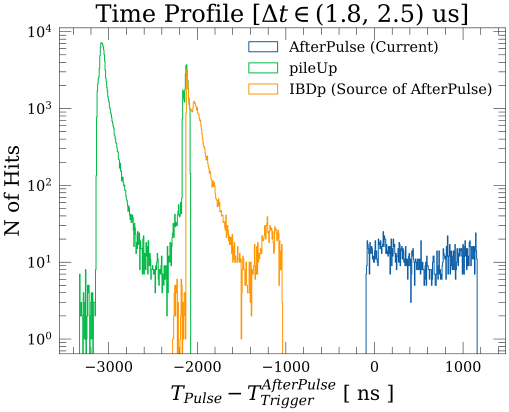

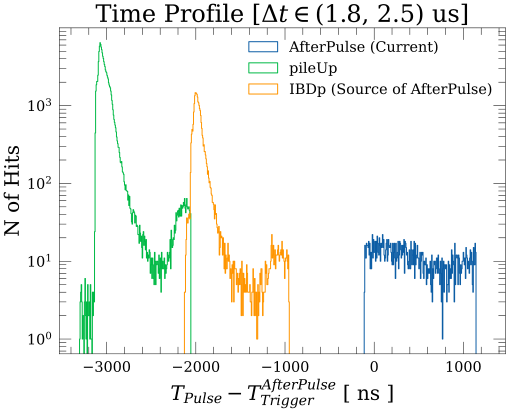

In [58]:
# v_bin_TimeInterval = [(1, 1.8), (2,2.5), (2.5, 4), (4, 5.5)]
plot_n_pre_source = 1
v_bin_TimeInterval = [ (1.8,2.5)]
for bin in v_bin_TimeInterval:
    print(np.where( (dir_features["TriggerTimeIntervalWithFilter"]<bin[1]) & (dir_features["TriggerTimeIntervalWithFilter"]>bin[0]) &
                    (dir_map["evtType"]=="AfterPulse")))
    for j_count, i in enumerate( np.where( (dir_features["TriggerTimeIntervalWithFilter"]<bin[1]) & (dir_features["TriggerTimeIntervalWithFilter"]>bin[0]) &
                    (dir_map["evtType"]=="AfterPulse")   )[0] ) :
        plt.figure()

        v_i_source_AfterPulse = np.where( dir_map["TriggerTime"] >=\
                                        dir_map["TriggerTime"][i]-dir_features["TriggerTimeIntervalWithFilter"][i]*1000-1 )[0]
        i_source_AfterPulse = min( v_i_source_AfterPulse[ dir_map["TriggerTime"][v_i_source_AfterPulse]-dir_map["TriggerTime"][i]<=0 ])
        # print(i_source_AfterPulse)
        # continue


        bins = np.arange( min(dir_map["PulseTimeTruth"][i_source_AfterPulse-plot_n_pre_source]-dir_map["TriggerTime"][i]),1250, 6)
        print(min(dir_map["PulseTimeTruth"][i_source_AfterPulse]-dir_map["TriggerTime"][i]))
        # if min(dir_map["PulseTimeTruth"][i_source_AfterPulse]-dir_map["TriggerTime"][i]) <0:
        #     print("Continue")
        #     continue

        # print( dir_map["TriggerTime"][i_source_AfterPulse]-dir_map["TriggerTime"][i] )

        plt.hist(dir_map["PulseTimeTruth"][i]-dir_map["TriggerTime"][i], bins=bins, histtype="step", label="AfterPulse (Current)")

        for j in range(i_source_AfterPulse-plot_n_pre_source, i):
            if j==i_source_AfterPulse:
                label = f"{dir_map['evtType'][j]} (Source of AfterPulse)"
            else:
                label= dir_map['evtType'][j]
            plt.hist(dir_map["PulseTimeTruth"][j]-dir_map["TriggerTime"][i], bins=bins,histtype="step", label=label)

        plt.xlabel("$T_{Pulse}-T_{Trigger}^{AfterPulse}$ [ ns ]")
        plt.title("Time Profile [$\Delta t\in$"+f"{bin} us]")
        plt.ylabel("N of Hits")
        plt.legend()
        plt.semilogy()
        # if j_count>1:
        #     break